In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings;
warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('Car details.csv')

In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8116,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5
8117,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24Nm@ 1,900-2,750(kgm@ rpm)",5
8118,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5
8119,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5
8120,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5


In [7]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
df.shape

(8121, 13)

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [11]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage          object
engine           object
max_power        object
torque           object
seats             int64
dtype: object

In [12]:
df["mileage"] = (df["mileage"]
                     .str.replace("kmpl", "")
                     .str.replace("km/kg", "")
                     .astype(float)
                    )

In [13]:
df["engine"] = (df["engine"]
                     .str.replace("CC", "")
                     .str.replace(",", "")
                     .astype(int)
                    )

In [14]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power         object
torque            object
seats              int64
dtype: object

In [15]:
df["max_power"] = (df["max_power"]
                     .str.replace("bhp", "")
                     .astype(float)
                    )

In [16]:
df['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2], dtype=int64)

In [17]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
torque            object
seats              int64
dtype: object

In [18]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5
8117,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24Nm@ 1,900-2,750(kgm@ rpm)",5
8118,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5
8119,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5


In [19]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8121.000000,8.121000e+03,8.121000e+03,8121.000000,8121.000000,8121.000000,8121.000000
mean,2013.813200,6.386323e+05,6.980446e+04,19.390086,1455.020441,91.189130,5.414235
std,4.027364,8.064868e+05,5.656911e+04,4.053252,502.417417,37.824579,0.961098
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,75.000000,32.800000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,1248.000000,14.000000


In [20]:
df["torque"] = df["torque"].str.replace(',', '') 
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7@ 2700(kgm@ rpm),5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5@ 4500(kgm@ rpm),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5
8117,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24Nm@ 1900-2750(kgm@ rpm),5
8118,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5
8119,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5


In [21]:
s = df["torque"].str.findall(r'[\d\.\d]+')


In [22]:
for i in range(0,7906):
    print(s[i])

['190', '2000']
['250', '1500', '2500']
['12.7', '2700']
['22.4', '1750', '2750']
['11.5', '4500']
['113.75', '4000']
['7.8', '4500']
['59', '2500']
['170', '1800', '2400']
['160', '2000']
['248', '2250']
['78', '4500']
['190', '2000']
['113', '4200']
['84', '3500']
['115', '3500', '3600']
['200', '1750']
['22.4', '1750', '2750']
['62', '3000']
['219.7', '1500', '2750']
['160', '2000']
['200', '1750']
['190', '2000']
['200', '1750']
['114', '3500']
['115', '4000']
['69', '3500']
['172.5', '1750']
['84', '3500']
['59', '2500']
['200', '1750']
['9.4', '2750']
['6.1', '3000']
['114.7', '4000']
['200', '1750']
['60', '3500']
['90', '3500']
['151', '4850']
['104', '4000']
['320', '1700', '2700']
['59', '2500']
['250', '1750', '2500']
['145', '4600']
['146', '4800']
['115', '4000']
['200', '1750']
['90', '3500']
['343', '1400', '3400']
['200', '1400', '3400']
['200', '1250', '4000']
['200', '1750']
['400', '2000', '2500']
['200', '1750']
['138', '4400']
['200', '1750']
['360', '1200', '3400'

['140', '1800', '3000']
['140', '1800', '3000']
['59', '2500']
['219.7', '1500', '2750']
['200', '1750', '3000']
['140', '1800', '3000']
['114.7', '4000']
['113', '4200']
['135', '2500']
['145', '4600']
['114', '3500']
['101', '3000']
['59', '2500']
['228', '4400']
['108', '4400']
['12.5', '2500']
['109', '4500']
['400', '1750', '3000']
['202', '3600', '5200']
['430', '1750', '2500']
['347', '4300']
['140', '4200']
['140', '4200']
['213', '4500']
['200', '1750']
['110', '4800']
['90', '3500']
['200', '1200', '3600']
['145', '4600']
['113', '4200']
['200', '1750']
['400', '1750', '2500']
['400', '1750', '2500']
['110', '4800']
['149', '4500']
['135', '2500']
['245', '1750']
['150', '4500']
['219.7', '1500', '2750']
['190', '2000']
['320', '1750', '2500']
['200', '1750']
['78', '4500']
['12.7', '2700']
['190', '2000']
['90', '3500']
['62', '3000']
['190', '2000']
['200', '1900']
['62', '3000']
['59', '2500']
['62', '3000']
['62', '3000']
['187', '2500']
['290', '1800', '2800']
['187', '2

['96', '3500']
['77', '3500']
['190', '2000']
['200', '1750']
['113', '4200']
['114', '4000']
['59', '2500']
['259.87', '1500', '3000']
['195', '1400', '2200']
['259.9', '1900', '2750']
['25.5', '1900']
['96.1', '3000']
['320', '1700', '2700']
['170', '1800', '2400']
['109', '4500']
['90', '3500']
['320', '1750', '2500']
['330', '1600', '2800']
['33.7', '1800']
['190', '2000']
['90', '3500']
['117', '4000']
['200', '1750']
['114', '4000']
['145', '4600']
['200', '1750', '3000']
['74.5', '4000']
['113', '4200']
['90', '3500']
['430', '1750', '2500']
['202', '3600', '5200']
['430', '1750', '2500']
['320', '1500', '3000']
['400', '4000']
['213', '4500']
['90', '3500']
['190', '2000']
['110', '4800']
['200', '1200', '3600']
['113', '4200']
['132', '3000']
['113', '4200']
['190.24', '1750', '2250']
['400', '1750', '2500']
['400', '1750', '2500']
['110', '4800']
['153', '3800']
['350', '1500', '2750']
['91', '4000']
['205', '1750', '3250']
['90', '3500']
['190', '2000']
['113', '4200']
['132

['248', '2250']
['180', '1440', '1500']
['187', '2500']
['145', '4600']
['190', '2000']
['200', '1750']
['219.7', '1750', '2750']
['215', '1750', '3000']
['190', '2000']
['160', '2000']
['190', '2000', '3000']
['240', '1600', '2800']
['150', '1750']
['173', '4000']
['450', '2000']
['250', '1500', '3000']
['13.1', '4600']
['90', '4000']
['90', '3500']
['146', '4800']
['113.75', '4000']
['90', '3500']
['450', '1600', '2400']
['113', '4500']
['99.07', '4500']
['113', '4200']
['103', '4500']
['290', '1800', '2800']
['170', '1800', '2400']
['74.5', '4000']
['121', '2800']
['210', '1900']
['13.5', '2500']
['500', '1600', '1800']
['250', '1000', '2000']
['300', '1600', '3000']
['204', '2000', '2750']
['190', '2000']
['250', '1250', '5000']
['160', '1500', '2750']
['219.6', '1750', '2750']
['250', '1500', '3000']
['400', '175', '2750']
['91', '4250']
['91', '4250']
['113', '4200']
['51', '4000']
['259.8', '1900', '2750']
['400', '1750', '2500']
['350', '1500', '3500']
['113', '4200']
['400', '

['117', '4000']
['200', '1750']
['175', '1500', '4100']
['114.7', '4000']
['72', '4386']
['175', '1500', '4100']
['200', '1750']
['219.7', '1500', '2750']
['190', '2000']
['84', '3500']
['116', '4750']
['190', '2000']
['135.3', '5000']
['200', '1750']
['11.4', '4000']
['280', '1800', '2800']
['150', '1750']
['380', '1750', '2750']
['20.4', '1400', '3400']
['120', '4250']
['219.66', '1500', '2750']
['140', '1800', '3000']
['90', '3500']
['200', '1750']
['114', '4000']
['84', '3500']
['16', '2000']
['200', '1750']
['290', '1800', '2800']
['14.3', '1800', '3000']
['290', '1800', '2800']
['259.8', '1900', '2750']
['140', '1800', '3000']
['91', '4250']
['190', '2000']
['190', '2000']
['90', '3500']
['4.8', '3000']
['20.4', '1400', '3400']
['12.5', '3500']
['200', '1750']
['250', '1000', '2000']
['190', '1750', '2250']
['190', '2000']
['62', '3000']
['280', '1800', '2800']
['22.4', '1750', '2750']
['290', '1800', '2800']
['111.8', '4000']
['84', '3500']
['74.5', '4000']
['114', '4000']
['78'

['259.9', '1900', '2750']
['400', '1750', '2500']
['200', '1750']
['218', '1400', '2600']
['190', '2000']
['219.7', '1500', '2750']
['219.7', '1500', '2750']
['200', '1750']
['200', '1400', '3400']
['190', '2000']
['259.87', '1500', '3000']
['190', '2000']
['13', '2500']
['16.3', '2000']
['250', '1500', '2500']
['190', '2000']
['190', '2000']
['110', '4800']
['190', '2000']
['190', '2000']
['200', '1750']
['145', '4600']
['190', '2000']
['90', '3500']
['115', '4000']
['200', '1750']
['300', '1750', '2500']
['190', '2000']
['343', '1400', '2800']
['113', '4200']
['125', '2000']
['190', '2000']
['400', '1750', '3000']
['330', '1600', '2800']
['113', '4200']
['113', '4200']
['190', '2000']
['380', '1750', '2500']
['74.5', '4000']
['330', '1600', '2800']
['90', '3500']
['113.75', '4000']
['69', '3500']
['135.3', '5000']
['113', '4200']
['160', '2000']
['90', '3500']
['62', '3000']
['190', '2000']
['190', '2000']
['135', '2500']
['170', '1800', '2400']
['218', '1400', '2600']
['219.6', '150

In [23]:
l=s.to_list()
len(l)

8121

In [24]:
ld = pd.DataFrame(l,columns = ['Column_1','Column2','Column3']) 
ld

,Column_1,Column2,Column3
0,190,2000,None
1,250,1500,2500
2,12.7,2700,None
3,22.4,1750,2750
4,11.5,4500,None
...,...,...,...
8116,113.7,4000,None
8117,24,1900,2750
8118,190,2000,None
8119,140,1800,3000


In [25]:
for i in range(0,8121):
    print(ld["Column_1"][i])

190
250
12.7
22.4
11.5
113.75
7.8
59
170
160
248
78
190
113
84
115
200
22.4
62
219.7
160
200
190
200
114
115
69
172.5
84
59
200
9.4
6.1
114.7
200
60
90
151
104
320
59
250
145
146
115
200
90
343
200
200
200
400
200
138
200
360
200
380
173
400
400
200
111.7
219.6
190
112
115
250
200
90
250
200
200
111.7
190
343
190
130
85
250
200
205
280
90
104
69
69
190
99.04
6.1
77
110
99.04
153
90
113.7
190
114
62
219.7
90
200
113
101
115
290
120
151
250
96
360
135
259.8
219.6
173
90
200
115
90
190
200
259.9
205
190
91
90
62
200
96.1
200
109
400
202
430
347
382
620
400
400
400
250
500
250
145
173
400
550
200
490
250
177.5
430
170
153
177.5
153
300
130
300
146
113
90
113
360
260
400
213
400
224
130
640
250
112
160
113
90
114.7
59
113
114
95
114
114
114
13.1
205
71
343
115
190
146
78
90
14.9
115
115
117
200
114
200
170
145
109
77
115
113.7
59
90
113
69
113
113
320
113.7
190
90
173
109
115
320
62
72
104
200
113.75
69
11.4
140
113
134
150
104
90
340
240
190
259.9
72
200
330
101
96.1
12.5
330
200
190
110
1

145
144.15
205
200
140
69
360
330
200
215
114
290
190
160
115
94.14
96.1
277.5
113
195
200
172.5
90
219.7
190
114
620
101
200
114
170
343
190
146
114
200
180
110
250
190
135
20.4
114
114
200
113.75
205
140
240
182.5
180
113
153
14.9
113
115
91
112
360
113.75
62
110
146
343
114.7
200
195
259.9
200
20.4
72
200
190
153
102
113
74.5
200
114
114
104
180
114
9.8
197
190
114
180
190
22.4
72
62
113
113.75
190
219.7
135.4
135.4
96.1
62
114.7
114.7
113.75
99
11.4
150
62
62
24
84
62
190
195
84
12.7
190
114.7
114.7
111.7
113
84
111.7
154.9
104
190
91
250
195
195
195
99.04
320
190
190
59
20.4
180
96
77
190
200
113
114
59
259.87
195
259.9
25.5
96.1
320
170
109
90
320
330
33.7
190
90
117
200
114
145
200
74.5
113
90
430
202
430
320
400
213
90
190
110
200
113
132
113
190.24
400
400
110
153
350
91
205
90
190
113
132
113
190.24
109
111.7
285
110
113.75
400
360
151
114.7
259.9
190
259.9
113
190
190
290
200
180
74.5
114
62
115
24
62
200
104
220
115
114
12.5
200
200
170
190
200
104
240
13.5
180
10.7
111.8
2

145
219.7
20.4
180
200
12.7
218
74.5
146
190
250
330
259.8
230
205
190
95
259.9
200
190
140
200
200
259.8
170
110
204
250
90
190
219.66
400
200
190
210
215
200
116
20.4
250
210
320
280
190
90
114
259.9
219.7
215
113
74.5
355
259.9
180
59
113
69
200
190
113
195
160
190
259.9
170
160
110
6.1
200
200
200
200
200
114
51
113
90
62
400
104
114.7
59
96
200
195
190
74.5
190
135
240
240
250
108
74.5
104
91
57
113.75
259.8
135
113.7
175
110
111.8
146
111.7
110
104
110
111.8
114
114
114
90
154.9
160
114.73
320
140
140
16.3
160
114.7
99.04
145
200
240
108
259.9
90
113.75
450
343
380
330
300
16.3
248
62
146
330
190
190
13.5
190
90
112
90
151
219.7
62
219.7
59
259.8
209
190
90
113
200
146
195
160
90
113
69
113
113
320
113.7
190
90
173
109
115
320
62
72
104
200
113.75
69
11.4
219.66
190
200
200
200
200
170
190
215
400
42
113
215
300
230
200
259.9
219.7
219.7
200
113
250
200
111.7
115
104
219.7
190
200
96
190
190
110
110
84
99.04
135
146
190
113
190
190
119
113.75
12.4
74.5
90
113
114
205
109
114.7
14

In [26]:
for i in range(0,8121):
    print(ld["Column2"][i])

2000
1500
2700
1750
4500
4000
4500
2500
1800
2000
2250
4500
2000
4200
3500
3500
1750
1750
3000
1500
2000
1750
2000
1750
3500
4000
3500
1750
3500
2500
1750
2750
3000
4000
1750
3500
3500
4850
4000
1700
2500
1750
4600
4800
4000
1750
3500
1400
1400
1250
1750
2000
1750
4400
1750
1200
1200
1750
4000
1750
1400
1750
4000
1500
2000
4000
4000
1500
1750
3500
1500
1750
1750
4000
2000
1400
2000
4000
2500
1500
1200
1750
1350
3500
4000
3500
3500
2000
4500
3000
3500
3750
4500
3800
3500
4000
2000
4000
3000
1500
3500
1750
4200
3000
4000
1800
4250
4850
1500
3000
1750
2500
1900
1500
4000
3500
1750
4000
3500
2000
1900
1900
1750
2000
4250
3500
3000
1750
3000
1750
4500
1750
3600
1750
4300
1750
1600
1750
1750
1750
1250
1600
1600
4600
4000
1750
1750
1750
1600
2750
4700
1750
1750
3800
4700
3800
1200
4000
1200
4800
4200
3500
4200
1200
1500
1750
4500
1750
4000
4000
1740
1500
4000
2000
4200
3500
4000
2500
4500
4000
3000
4000
4000
4000
4600
1800
3500
1400
3500
1750
4800
4500
3500
3000
4000
3200
4000
1750
3500
1750


1400
4000
1750
1400
2000
5000
1750
1750
2000
4800
3000
3500
4000
1750
1900
2250
4500
2000
3500
4100
1750
4200
3500
1750
4400
1750
1200
4000
2000
4000
3500
4000
1750
3500
2000
4200
1800
4500
4500
1800
1800
1700
1750
1400
3500
2000
2000
4500
1750
1750
3500
3500
1400
2000
3000
4800
1400
1400
4800
1750
3500
3500
4850
3500
4386
3500
3500
1500
2500
4500
1750
4000
4000
1500
1800
1400
4000
4000
4000
4850
2000
4000
2000
4000
4850
3500
1750
1500
4200
4500
3500
1500
3500
4000
1400
2000
1800
4400
1500
1900
4850
2000
3750
2000
2500
1600
1700
2500
2500
1700
2500
1750
4400
2500
4000
3500
3200
5000
4000
4200
1400
4000
1750
3000
3000
2500
4386
2500
4000
2000
1500
2700
1750
2000
2250
4200
4000
3500
2000
1750
3500
4000
2400
1440
3100
3000
2000
3000
2000
2500
3500
4400
1440
4100
1750
4000
3000
3000
3500
3500
4100
3500
2500
1400
1800
1700
4200
3500
1400
4800
1500
4800
1750
4000
1500
2000
1600
1750
4000
1200
4200
4000
1750
3500
4500
4100
4500
2000
4000
1800
4000
4000
4000
2000
2500
4400
3500
3500
3000
1400


1750
4000
1750
1900
3000
2500
2500
1400
4000
2500
3500
4500
2000
4600
4000
3500
1750
1800
1600
3500
4400
4000
4400
4000
2000
3000
2000
3000
1950
4100
3500
3500
2000
4000
4000
3000
4400
2500
4000
1400
1750
3600
1750
1500
1750
4500
3500
2000
4800
1200
4200
3000
4200
1750
1750
1750
4800
3800
1500
3500
4500
1700
2250
1440
2500
4600
2000
1750
1750
1750
2000
2000
2000
1600
1750
4000
2000
1500
4600
4000
3500
4800
4000
3500
1600
4500
4500
4200
4500
1800
1800
4000
2800
1900
2500
1600
1000
1600
2000
2000
1250
1500
1750
1500
175
4250
4250
4200
4000
1900
1750
1500
4200
1400
1750
1800
1750
1500
1500
1750
1750
4000
3000
4000
3000
1500
1500
1700
1800
1750
3500
4000
3000
1800
1750
3600
1750
1500
1750
4500
3500
2000
4800
1200
4200
3000
4200
1750
1750
1750
4800
3800
1500
3000
3000
3500
1750
3500
1800
1750
2600
2000
3000
1750
4000
3500
1750
2000
4000
1400
3500
2000
1400
1400
2500
2250
2000
3000
2700
4000
4000
4500
1750
1400
1400
2000
1500
4250
4100
1750
4000
1500
3500
4000
4200
3500
3500
1800
1800
4000
4

1750
1750
1750
1500
1750
1750
1750
1500
1400
4800
4000
1750
4000
2000
3000
2000
1400
1400
1500
2000
2000
4000
4300
4500
3000
3000
3500
3500
1600
1500
2000
2000
2000
3500
3500
2000
1600
4500
1750
2000
2500
4000
3000
4500
1750
2000
2000
1600
2000
2000
400
2000
1400
4000
4000
4000
3500
1750
3500
1750
1750
2600
2000
1750
3500
3500
2250
1400
4000
2000
1750
1500
1750
3000
2500
2700
1500
1440
1750
4000
3500
1600
1750
1750
1750
4000
2000
4000
4000
4000
4000
1600
4000
2500
3000
3500
4200
4000
3500
1750
4000
1750
4000
1500
2000
3500
2000
4500
4000
1440
4000
3000
1400
4800
2000
2500
4000
4250
3500
1500
1750
4500
3000
1750
4500
1750
1900
1800
4000
4000
1800
2000
3000
3500
1750
2700
3000
4600
1900
2500
4000
3500
3500
3500
2000
4000
2500
4500
3500
4200
1500
2500
2250
1600
1500
2000
4500
4000
1600
1400
1400
1440
1750
1800
1500
2000
1750
1750
4600
4000
1750
1500
2000
2000
1750
1600
2000
1700
3500
4000
3500
3000
2000
4000
1500
2000
1500
4000
1750
4000
1750
4000
3500
3500
4250
3500
4000
1500
1750
4000
4

In [27]:
def N_M(value):
    value1=0
    value1=value* 9.80665 
    return value1

In [28]:
for i in range(0,8121):
    #print(ld["Column_1"][i])
    strg=df["torque"][i]
    valid=strg.find("kgm")
    a=0
    if valid!=-1:
        a=ld["Column_1"][i]
        ld["Column_1"][i]=N_M(float(a))
       
    else:
        ld["Column_1"][i]=ld["Column_1"][i]
print(ld["Column_1"])


0              190
1              250
2       124.544455
3       219.668960
4       112.776475
           ...    
8116         113.7
8117    235.359600
8118           190
8119           140
8120           140
Name: Column_1, Length: 8121, dtype: object


In [29]:
ld['Column_1']=ld['Column_1'].astype(float)

In [30]:
for i in range (0,8121):
    if ld["Column3"][i]==None:
        ld["Column2"][i]=ld["Column2"][i]
    else:
        #print(ld["Column2"][i],ld["Column3"][i])
        ld["Column2"][i]=((float(ld["Column2"][i]))+(float(ld["Column3"][i])) )/2

print(ld["Column2"])
                      

0         2000
1       2000.0
2         2700
3       2250.0
4         4500
         ...  
8116      4000
8117    2325.0
8118      2000
8119    2400.0
8120    2400.0
Name: Column2, Length: 8121, dtype: object


In [31]:
ld['Column2']=ld['Column2'].astype(float)

In [32]:
for i in range(0,8121):
    print(ld["Column2"][i])

2000.0
2000.0
2700.0
2250.0
4500.0
4000.0
4500.0
2500.0
2100.0
2000.0
2250.0
4500.0
2000.0
4200.0
3500.0
3550.0
1750.0
2250.0
3000.0
2125.0
2000.0
1750.0
2000.0
1750.0
3500.0
4000.0
3500.0
1750.0
3500.0
2500.0
1750.0
2750.0
3000.0
4000.0
1750.0
3500.0
3500.0
4850.0
4000.0
2200.0
2500.0
2125.0
4600.0
4800.0
4000.0
1750.0
3500.0
2400.0
2400.0
2625.0
1750.0
2250.0
1750.0
4400.0
1750.0
2300.0
2400.0
2125.0
4000.0
2375.0
2100.0
2375.0
4000.0
2125.0
2000.0
4000.0
4000.0
2250.0
1750.0
3500.0
2250.0
1750.0
1750.0
4000.0
2000.0
2400.0
2000.0
4000.0
2500.0
2000.0
2400.0
2500.0
2975.0
3500.0
4000.0
3500.0
3500.0
2000.0
4500.0
3000.0
3500.0
3750.0
4500.0
3800.0
3500.0
4000.0
2000.0
4000.0
3000.0
2125.0
3500.0
2375.0
4200.0
3000.0
4000.0
2300.0
4250.0
4850.0
3000.0
3000.0
2275.0
2500.0
2325.0
2125.0
4000.0
3500.0
1750.0
4000.0
3500.0
2000.0
1900.0
2325.0
2500.0
2000.0
4250.0
3500.0
3000.0
1750.0
3000.0
1750.0
4500.0
2375.0
4400.0
2125.0
4300.0
2000.0
2000.0
2125.0
2125.0
2125.0
3125.0
1700.0
2600.0

1750.0
2500.0
4000.0
1750.0
3500.0
4000.0
3500.0
2500.0
3500.0
2500.0
4000.0
4000.0
2125.0
4000.0
2400.0
2200.0
2250.0
4100.0
4100.0
3000.0
2000.0
2150.0
2100.0
1750.0
2000.0
2300.0
4000.0
4000.0
2125.0
2325.0
4000.0
4000.0
2000.0
1900.0
3000.0
2400.0
2100.0
4000.0
4000.0
2325.0
4300.0
1750.0
4000.0
4500.0
2000.0
2500.0
2500.0
3800.0
2000.0
3500.0
2000.0
4500.0
2500.0
2000.0
2000.0
2000.0
2125.0
1750.0
2325.0
2125.0
2250.0
2000.0
4200.0
4000.0
2000.0
4000.0
3500.0
2000.0
3650.0
1750.0
2100.0
4000.0
4000.0
2250.0
2125.0
2125.0
4000.0
2500.0
4000.0
2325.0
2200.0
4200.0
2125.0
4200.0
3000.0
3500.0
2200.0
4386.0
4600.0
2325.0
4000.0
2200.0
2250.0
2000.0
2125.0
4400.0
2125.0
2250.0
1750.0
4500.0
3500.0
2000.0
4800.0
2400.0
4200.0
3000.0
4200.0
2000.0
2125.0
2125.0
4800.0
3800.0
2125.0
4800.0
3100.0
2000.0
1750.0
2250.0
1750.0
3500.0
3000.0
4000.0
2250.0
2300.0
4000.0
2375.0
3500.0
3000.0
2125.0
2250.0
2250.0
2000.0
2000.0
2000.0
2000.0
4800.0
1750.0
2200.0
2000.0
2250.0
2400.0
4000.0
2200.0

2000.0
2300.0
1900.0
2000.0
4000.0
4000.0
3000.0
3200.0
2325.0
3000.0
1750.0
4000.0
2000.0
3550.0
4000.0
3500.0
1750.0
1750.0
2100.0
2375.0
1750.0
4000.0
2200.0
2500.0
1470.0
2600.0
4000.0
1750.0
4000.0
4000.0
2375.0
4000.0
1750.0
4000.0
2500.0
1900.0
4000.0
1800.0
2375.0
2000.0
2200.0
2125.0
2125.0
1750.0
2000.0
1900.0
2125.0
1750.0
4750.0
2400.0
1500.0
1900.0
2200.0
2300.0
2000.0
3500.0
4000.0
2325.0
2125.0
2125.0
4500.0
2750.0
2750.0
2200.0
4250.0
2200.0
4000.0
2000.0
4000.0
4600.0
2400.0
4200.0
4200.0
1750.0
1750.0
3400.0
2000.0
2125.0
2400.0
2375.0
1750.0
3500.0
1750.0
2000.0
2400.0
4000.0
4500.0
4000.0
4000.0
2000.0
2250.0
1750.0
2375.0
2400.0
2200.0
2125.0
2000.0
3000.0
2325.0
3500.0
4000.0
2125.0
1750.0
4000.0
4200.0
2400.0
4000.0
2000.0
2250.0
2500.0
1750.0
3500.0
2000.0
3500.0
3500.0
2000.0
4500.0
2375.0
4400.0
2125.0
4300.0
2000.0
2125.0
4400.0
3125.0
1750.0
4400.0
2125.0
1750.0
2200.0
2250.0
4000.0
4300.0
1750.0
1800.0
4200.0
4000.0
4000.0
3000.0
2500.0
2200.0
2200.0
3500.0

2500.0
4000.0
2000.0
2200.0
1750.0
2000.0
2000.0
2000.0
2200.0
2400.0
3000.0
4100.0
2400.0
2000.0
2000.0
1750.0
4000.0
1750.0
2000.0
3500.0
3500.0
3500.0
2000.0
3500.0
2375.0
2500.0
3500.0
2500.0
2500.0
4400.0
2375.0
4000.0
4800.0
1900.0
2200.0
1800.0
1900.0
1750.0
2000.0
1750.0
2000.0
4500.0
2500.0
4000.0
2400.0
1820.0
2200.0
4200.0
4000.0
1800.0
2500.0
2300.0
2250.0
2125.0
2000.0
2000.0
2000.0
2125.0
2125.0
2000.0
2125.0
2200.0
2300.0
2300.0
2375.0
2200.0
1750.0
3500.0
4200.0
3500.0
2000.0
1750.0
4200.0
3500.0
5000.0
1875.0
4500.0
2000.0
2000.0
2325.0
2000.0
2125.0
2250.0
2500.0
2300.0
2100.0
2300.0
2325.0
2100.0
2400.0
2500.0
2300.0
2000.0
2325.0
2200.0
1750.0
1750.0
3175.0
3000.0
1800.0
3500.0
2200.0
2250.0
2000.0
4000.0
2250.0
2250.0
4000.0
1800.0
4000.0
3500.0
2500.0
3000.0
4200.0
3500.0
4386.0
2125.0
3000.0
2100.0
2250.0
2250.0
2300.0
4500.0
2300.0
2000.0
2375.0
2000.0
4000.0
3650.0
4800.0
2000.0
2400.0
2500.0
3500.0
2400.0
2250.0
2000.0
4000.0
4800.0
2125.0
2100.0
1750.0
4400.0

4000.0
2125.0
2000.0
2375.0
3500.0
2000.0
2000.0
3650.0
3650.0
3500.0
4500.0
2500.0
4800.0
2000.0
4200.0
2000.0
2000.0
4250.0
4000.0
2600.0
4000.0
3500.0
4200.0
4000.0
2500.0
4500.0
4000.0
4600.0
1800.0
3500.0
2200.0
4250.0
4000.0
4200.0
3000.0
2000.0
3500.0
3500.0
3500.0
3400.0
2000.0
2000.0
2500.0
4250.0
4250.0
2500.0
3500.0
2125.0
4400.0
2125.0
2250.0
1750.0
4500.0
3500.0
2000.0
4800.0
2400.0
4200.0
3000.0
4200.0
2000.0
2125.0
2125.0
4800.0
3800.0
2125.0
4386.0
2250.0
3500.0
2325.0
2375.0
2000.0
2325.0
2000.0
2500.0
2000.0
2400.0
3800.0
1470.0
4250.0
4000.0
2300.0
2000.0
4200.0
2000.0
3000.0
4000.0
1750.0
2200.0
4250.0
4386.0
4000.0
4500.0
1750.0
1750.0
3800.0
2000.0
2375.0
2200.0
1750.0
1800.0
4300.0
3500.0
4000.0
3000.0
1750.0
3000.0
3500.0
2000.0
4800.0
4000.0
4200.0
4200.0
1750.0
4200.0
1470.0
2125.0
1900.0
1750.0
2400.0
2325.0
4200.0
4500.0
2000.0
2000.0
1750.0
2000.0
4386.0
2000.0
2200.0
2250.0
2400.0
2375.0
1750.0
4500.0
4386.0
2125.0
3000.0
3500.0
2250.0
3000.0
2125.0
4000.0

2000.0
2000.0
2000.0
2875.0
3750.0
2000.0
3000.0
3100.0
2325.0
1900.0
2500.0
2000.0
2400.0
1800.0
2000.0
1800.0
4800.0
4000.0
3000.0
2000.0
2400.0
4000.0
2000.0
4000.0
4200.0
4386.0
4500.0
2500.0
2125.0
2125.0
2000.0
2500.0
1800.0
2000.0
3500.0
1750.0
3500.0
2300.0
3500.0
3500.0
2125.0
2500.0
1800.0
2000.0
2200.0
3800.0
2325.0
3800.0
2500.0
1750.0
2000.0
1750.0
3500.0
4000.0
3500.0
2000.0
3000.0
4500.0
4500.0
4000.0
3500.0
3500.0
1750.0
2000.0
2000.0
1750.0
4200.0
2400.0
1750.0
1750.0
4000.0
4000.0
2000.0
3500.0
2125.0
2300.0
4200.0
3000.0
3000.0
3000.0
1470.0
2375.0
4300.0
4400.0
2125.0
4300.0
1900.0
4500.0
4800.0
2400.0
4800.0
2125.0
2800.0
2000.0
2250.0
2000.0
4000.0
2750.0
4400.0
1800.0
3550.0
3500.0
2750.0
3500.0
3500.0
4200.0
3500.0
4000.0
4386.0
1750.0
2375.0
3000.0
2500.0
4000.0
2300.0
3000.0
4000.0
2500.0
2200.0
4400.0
3500.0
4000.0
3000.0
2500.0
4000.0
4100.0
2125.0
2250.0
2300.0
2125.0
2400.0
2400.0
3500.0
2750.0
4200.0
1650.0
4200.0
4500.0
2250.0
2125.0
4600.0
4800.0
1750.0

In [33]:
ld

,Column_1,Column2,Column3
0,190.000000,2000.0,None
1,250.000000,2000.0,2500
2,124.544455,2700.0,None
3,219.668960,2250.0,2750
4,112.776475,4500.0,None
...,...,...,...
8116,113.700000,4000.0,None
8117,235.359600,2325.0,2750
8118,190.000000,2000.0,None
8119,140.000000,2400.0,3000


In [34]:
df['torque_NM']=ld['Column_1']
df['torque_RPM']=ld['Column2']

In [35]:
df['torque_NM'].max()

3726.5269999999996

In [36]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_NM,torque_RPM
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7@ 2700(kgm@ rpm),5,124.544455,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5@ 4500(kgm@ rpm),5,112.776475,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,113.700000,4000.0
8117,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24Nm@ 1900-2750(kgm@ rpm),5,235.359600,2325.0
8118,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,190.000000,2000.0
8119,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,140.000000,2400.0


In [37]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM
count,8121.000000,8.121000e+03,8.121000e+03,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000
mean,2013.813200,6.386323e+05,6.980446e+04,19.390086,1455.020441,91.189130,5.414235,179.698578,2881.270589
std,4.027364,8.064868e+05,5.656911e+04,4.053252,502.417417,37.824579,0.961098,117.298479,990.322899
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,75.000000,32.800000,2.000000,9.400000,900.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.000000,5.000000,111.700000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,170.000000,2400.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,205.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,1248.000000,14.000000,3726.527000,21800.000000


In [38]:
df.drop(['torque'],axis=1,inplace=True)

In [39]:
#Data Visualizations

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

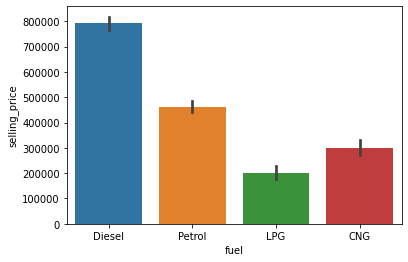

In [40]:
sns.barplot('fuel', 'selling_price', data = df)
# Diesel cars are costlier than other cars

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

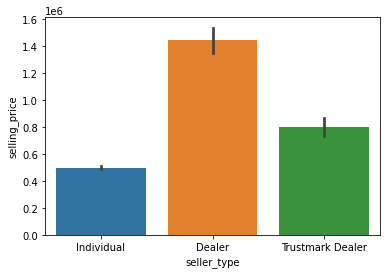

In [41]:
sns.barplot('seller_type', 'selling_price', data = df)
# cars sold by Dealers are costlier

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

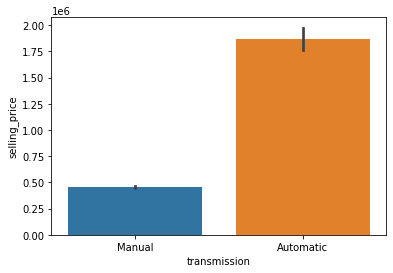

In [42]:
sns.barplot('transmission', 'selling_price', data = df)
#Automatic cars are costlier than manual cars

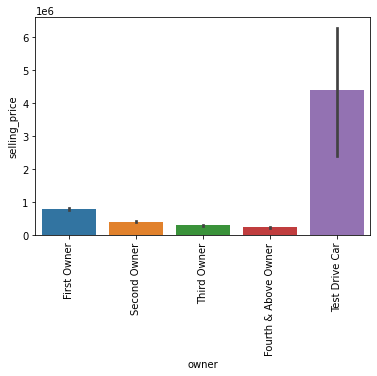

In [43]:
sns.barplot('owner', 'selling_price', data = df)
plt.xticks(rotation = 90)
plt.show()
# Test Drive cars are way more costleir than other cars

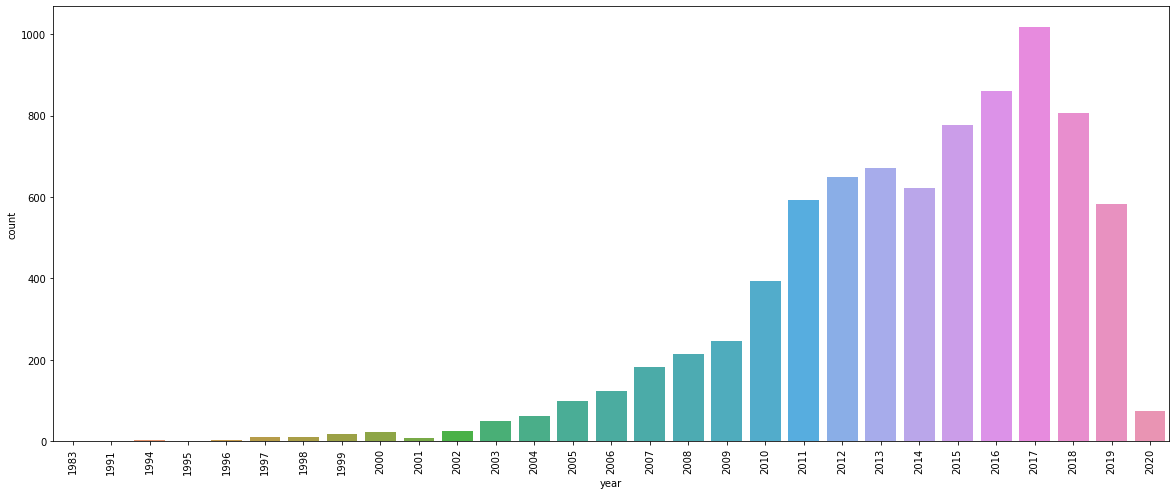

In [44]:
plt.figure(figsize = (20,8))
sns.countplot(df['year'])
plt.xticks(rotation = 90)
plt.show()
# majority cars present on the site were brought in the year 2017

In [45]:
seller_type_count = df['seller_type'].value_counts()
seller_type_count
# Seller_Type - Defines whether the seller is a dealer or an individual.

Individual          6759
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [46]:
labels = seller_type_count.keys()
labels

Index(['Individual', 'Dealer', 'Trustmark Dealer'], dtype='object')

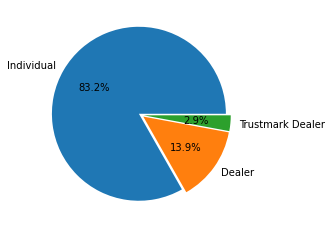

In [47]:
plt.pie(seller_type_count, labels = labels, autopct = '%0.1f%%', explode = [0.03]*3)
plt.show()
# majority car sellers are individuals

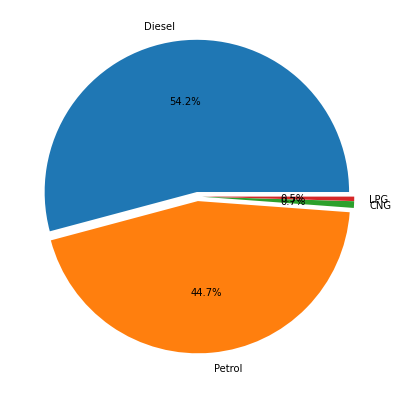

In [48]:
plt.figure(figsize = (10,7))
fuel_type = df['fuel'].value_counts()

labels = fuel_type.keys()
labels


plt.pie(fuel_type, labels = labels, autopct = '%0.1f%%', explode = [0.03]*4)
plt.show()
# 54.2% of cars present on the site have fuel type - diesel
# 44.4% of cars present on the site have fuel type - petrol

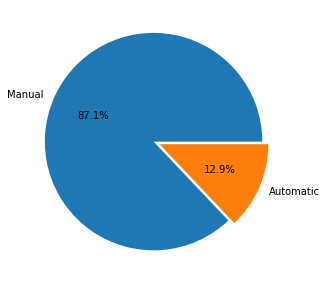

In [49]:
plt.figure(figsize = (5,5))
trans = df['transmission'].value_counts()

labels = trans.keys()
#labels

plt.pie(trans, labels = labels, autopct = '%0.1f%%', explode = [0.03]*2)
plt.show()
# 91.6% of cars present on the site are manual
# 8.4% of cars present on the site are automatic

Index(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner',
       'Test Drive Car'],
      dtype='object')


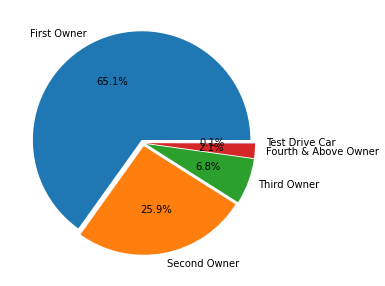

In [50]:
plt.figure(figsize = (5,5))
owner = df['owner'].value_counts()

labels = owner.keys()
print(labels)

plt.pie(owner, labels = labels, autopct = '%0.1f%%', explode = [0.03]*5)
plt.show()

# 61.2% cars on the site have 1 prvious owner
# 28.5% cars on the site have 2 previous owners
# % of test drive cars are very rare

<AxesSubplot:xlabel='seats', ylabel='count'>

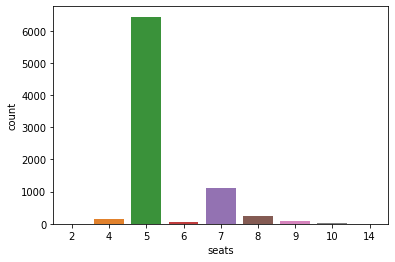

In [51]:
sns.countplot(df['seats'])
# majority cars are 5 seater


In [52]:
df['name'].value_counts()

Maruti Swift Dzire VDI         129
Maruti Alto 800 LXI             82
Maruti Alto LXi                 71
BMW X4 M Sport X xDrive20d      62
Maruti Swift VDI                61
                              ... 
Mahindra Verito 1.5 D6 BSIV      1
Maruti Celerio VXi AMT           1
Nissan Micra XE                  1
Hyundai Santro AT                1
BMW 5 Series 525d                1
Name: name, Length: 2056, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='count'>

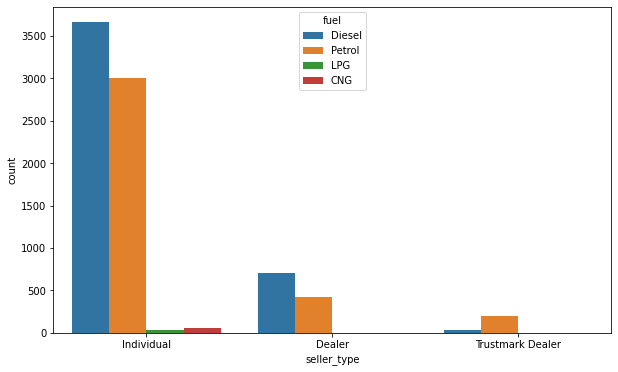

In [53]:
plt.figure(figsize = (10,6))
sns.countplot(df['seller_type'], hue = df['fuel'])
# individual sellers mostly sell cars of fuel type diesel and petrol

<AxesSubplot:xlabel='seller_type', ylabel='count'>

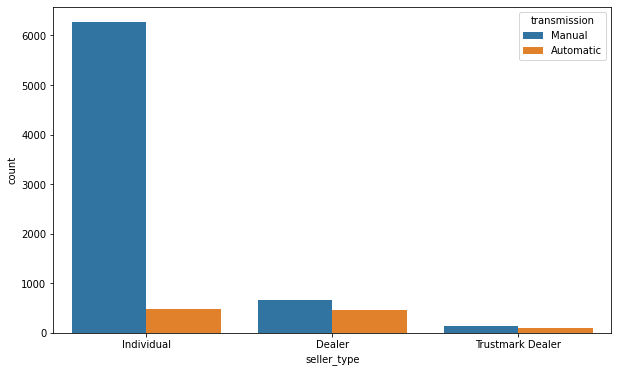

In [54]:
plt.figure(figsize = (10,6))
sns.countplot(df['seller_type'], hue = df['transmission'])
# all the seller types prefers selling manual cars

<AxesSubplot:xlabel='seller_type', ylabel='count'>

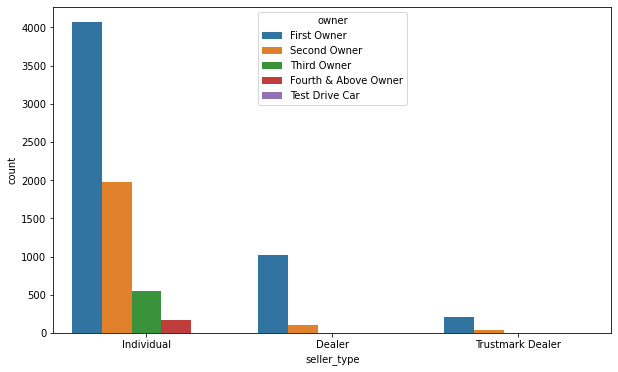

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(df['seller_type'], hue = df['owner'])

In [56]:
df['current_year']=2020

In [57]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.000000,2000.0,2020
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.000000,2000.0,2020
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,124.544455,2700.0,2020
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.668960,2250.0,2020
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.776475,4500.0,2020


In [58]:
df['no_of_year_used']=df['current_year']- df['year']

In [59]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year,no_of_year_used
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.000000,2000.0,2020,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.000000,2000.0,2020,6
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,124.544455,2700.0,2020,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.668960,2250.0,2020,10
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.776475,4500.0,2020,13


In [60]:
df.drop(['year'],axis=1,inplace=True)

In [61]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year,no_of_year_used
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.000000,2000.0,2020,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.000000,2000.0,2020,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,124.544455,2700.0,2020,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.668960,2250.0,2020,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.776475,4500.0,2020,13


In [62]:
df.drop(['current_year'],axis=1,inplace=True)

In [63]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.000000,2000.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.000000,2000.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,124.544455,2700.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.668960,2250.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.776475,4500.0,13


In [64]:
df.drop(['name'],axis=1,inplace=True)

In [65]:
final_dataset=df

In [66]:
final_dataset.isna().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
seats              0
torque_NM          0
torque_RPM         0
no_of_year_used    0
dtype: int64

In [67]:
final_dataset.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
count,8.121000e+03,8.121000e+03,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000,8121.000000
mean,6.386323e+05,6.980446e+04,19.390086,1455.020441,91.189130,5.414235,179.698578,2881.270589,6.186800
std,8.064868e+05,5.656911e+04,4.053252,502.417417,37.824579,0.961098,117.298479,990.322899,4.027364
min,2.999900e+04,1.000000e+00,0.000000,75.000000,32.800000,2.000000,9.400000,900.000000,0.000000
25%,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.000000,5.000000,111.700000,2000.000000,3.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,170.000000,2400.000000,5.000000
75%,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,205.000000,4000.000000,9.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,1248.000000,14.000000,3726.527000,21800.000000,37.000000


In [68]:
final_dataset.corr()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
selling_price,1.000000,-0.225461,-0.117264,0.454229,0.702610,0.041925,0.470551,-0.135336,-0.414527
km_driven,-0.225461,1.000000,-0.169934,0.200246,-0.035497,0.225404,0.072259,-0.238356,0.419188
mileage,-0.117264,-0.169934,1.000000,-0.564272,-0.339874,-0.444981,-0.236490,-0.085126,-0.335320
engine,0.454229,0.200246,-0.564272,1.000000,0.648004,0.601754,0.588984,-0.357361,-0.022370
max_power,0.702610,-0.035497,-0.339874,0.648004,1.000000,0.172781,0.612445,-0.139098,-0.221982
seats,0.041925,0.225404,-0.444981,0.601754,0.172781,1.000000,0.274321,-0.295789,0.009819
torque_NM,0.470551,0.072259,-0.236490,0.588984,0.612445,0.274321,1.000000,-0.383006,-0.099528
torque_RPM,-0.135336,-0.238356,-0.085126,-0.357361,-0.139098,-0.295789,-0.383006,1.000000,-0.032124
no_of_year_used,-0.414527,0.419188,-0.335320,-0.022370,-0.221982,0.009819,-0.099528,-0.032124,1.000000


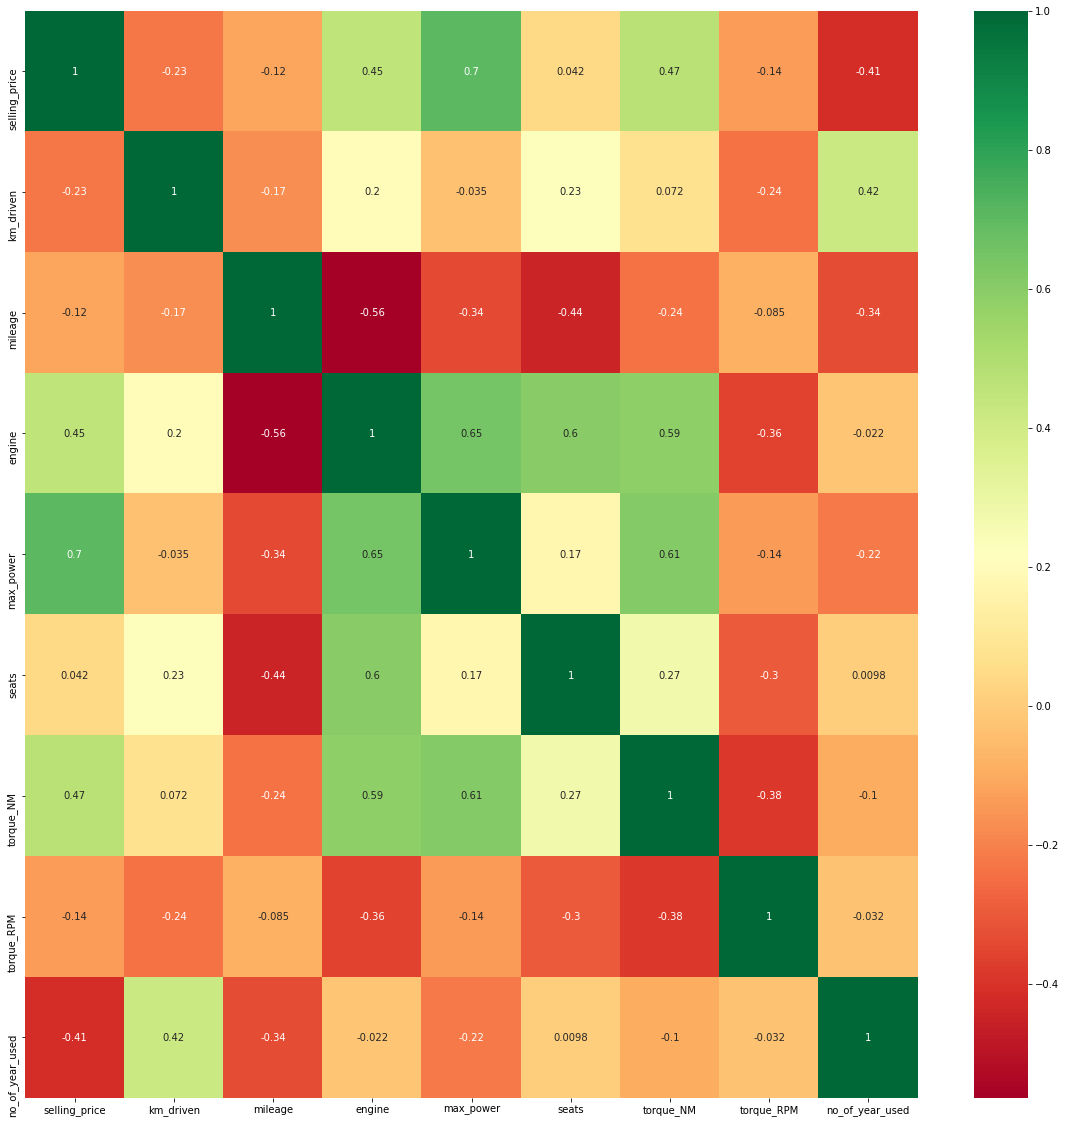

In [69]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [70]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [71]:
final_dataset.head()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5,190.000000,2000.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498,103.52,5,250.000000,2000.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497,78.00,5,124.544455,2700.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396,90.00,5,219.668960,2250.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298,88.20,5,112.776475,4500.0,13,0,0,1,1,0,1,0,0,0,0


In [72]:
final_dataset.shape

(8121, 19)

In [73]:
X=final_dataset.iloc[:,1:15]
y=final_dataset.iloc[:,0]

In [74]:
X.head()

,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,145500,23.40,1248,74.00,5,190.000000,2000.0,6,1,0,0,1,0,1
1,120000,21.14,1498,103.52,5,250.000000,2000.0,6,1,0,0,1,0,1
2,140000,17.70,1497,78.00,5,124.544455,2700.0,14,0,0,1,1,0,1
3,127000,23.00,1396,90.00,5,219.668960,2250.0,10,1,0,0,1,0,1
4,120000,16.10,1298,88.20,5,112.776475,4500.0,13,0,0,1,1,0,1


In [75]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [76]:
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor() 
model.fit(X,y)

ExtraTreesRegressor()

In [77]:
print(model.feature_importances_)

[4.94027166e-02 1.93876273e-02 7.76654877e-02 2.08927380e-01
 9.10053504e-03 8.21675298e-02 2.56556764e-02 1.55579787e-01
 1.96547701e-02 6.24806578e-06 1.58967199e-02 2.58195359e-02
 5.06508424e-04 3.10229478e-01]


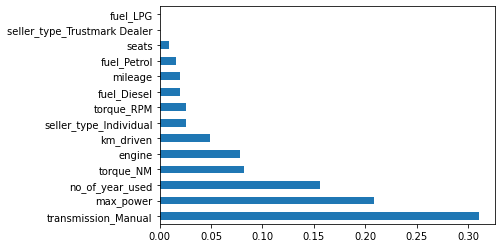

In [78]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

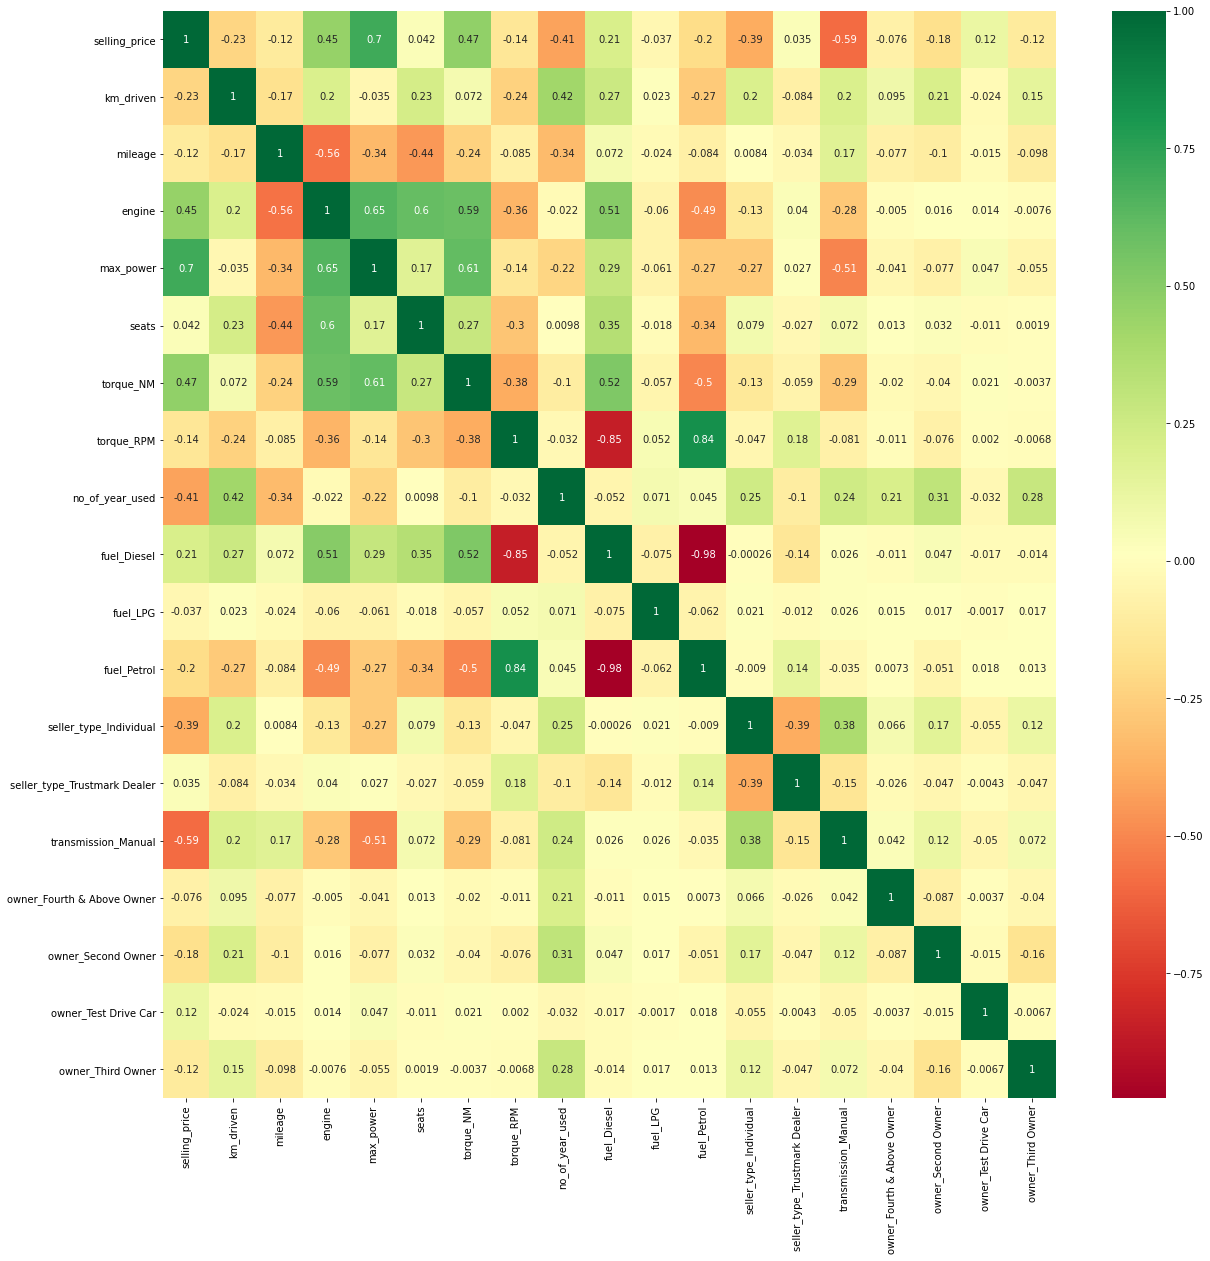

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=2020, shuffle=True)
results = cross_val_score(regressor, X, y, cv=kfold, scoring='r2')
R2 = results
print(R2)
print("R-Squared: %.2f" % (R2.mean()))

[0.36409791 0.66918653 0.68075925 0.66194427 0.66703718]
R-Squared: 0.61


In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = dict(alpha=np.linspace(0.01,40))
clf = Ridge()
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters, cv=kfold,scoring='r2')
cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)
cv.best_estimator_

{'alpha': 0.01}
0.6086046727055695


Ridge(alpha=0.01)

In [83]:
predictions=cv.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

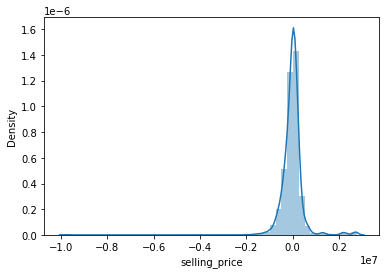

In [84]:
sns.distplot(y_test-predictions)

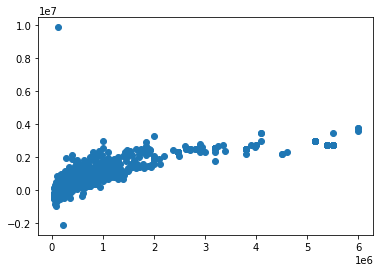

In [85]:
plt.scatter(y_test,predictions)

In [86]:
from sklearn.linear_model import Lasso
parameters = dict(alpha=np.linspace(0.01,100))
clf = Lasso()
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters, cv=kfold,scoring='r2')
cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)
best_model = cv.best_estimator_
print(best_model.coef_)
print(best_model.intercept_)

{'alpha': 0.01}
0.6086050212810046
Lasso(alpha=0.01)
[-1.10618754e+00  1.18674166e+04  3.18408756e+02  8.55352061e+03
 -7.61198471e+04  4.13046057e+02 -1.42152810e+02 -3.96694221e+04
 -2.53006282e+05  2.76941588e+05 -2.69826722e+03 -2.78526917e+05
 -3.88867787e+05 -5.43112753e+05]
1088307.5711161864


In [87]:
predictions=cv.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

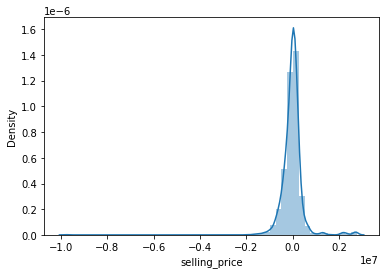

In [88]:
sns.distplot(y_test-predictions)

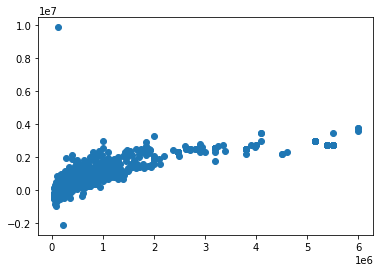

In [89]:
plt.scatter(y_test,predictions)

In [90]:
from sklearn.linear_model import ElasticNet
parameters = dict(alpha=np.linspace(0,10,5), l1_ratio=np.linspace(0,1,10))
clf = ElasticNet()
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters, cv=kfold,scoring='r2')
cv.fit(X,y)
# Viewing CV Results
df_cv = pd.DataFrame(cv.cv_results_)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)
# Object of best model
cv.best_estimator_

{'alpha': 0.0, 'l1_ratio': 0.0}
0.6086050287450188


ElasticNet(alpha=0.0, l1_ratio=0.0)

In [91]:
predictions=cv.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

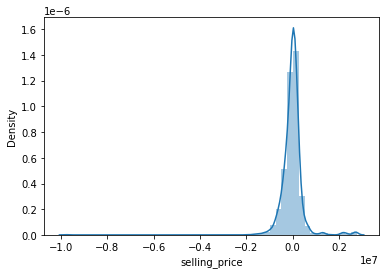

In [92]:
sns.distplot(y_test-predictions)

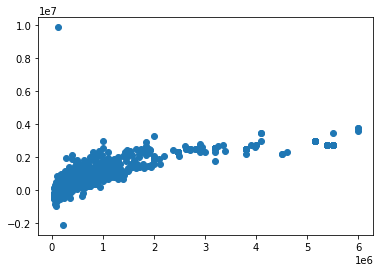

In [93]:
plt.scatter(y_test,predictions)

In [94]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3,random_state=2020)
clf2 = clf.fit(X_train, y_train)

depth_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2020)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.9444944577639559


In [95]:
predictions=cv.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

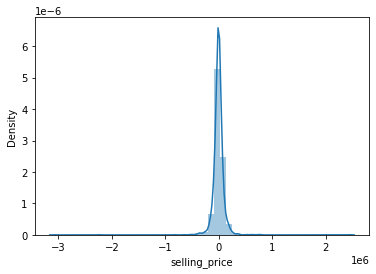

In [96]:
sns.distplot(y_test-predictions)

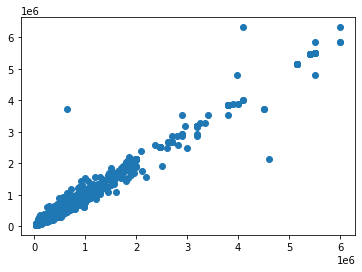

In [97]:
plt.scatter(y_test,predictions)

In [98]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [100]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [101]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [102]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [105]:
rf_random.best_score_

0.9580695978915458

In [106]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

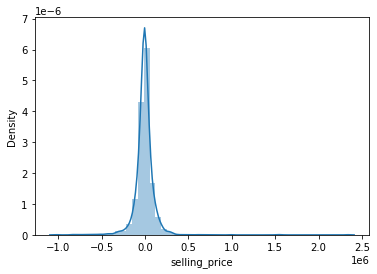

In [107]:
sns.distplot(y_test-predictions)

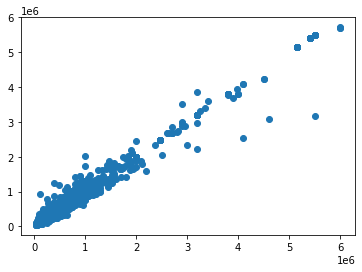

In [108]:
plt.scatter(y_test,predictions)

In [109]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 63796.653396763395
MSE: 14768656924.189487
RMSE: 121526.36308303432


In [110]:
#feat_importances = pd.Series(rf_random.feature_importances_, index=X.columns)
#feat_importances.nlargest(15).plot(kind='barh')
#plt.show()

In [111]:
final_dataset.head()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5,190.000000,2000.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498,103.52,5,250.000000,2000.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497,78.00,5,124.544455,2700.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396,90.00,5,219.668960,2250.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298,88.20,5,112.776475,4500.0,13,0,0,1,1,0,1,0,0,0,0


In [112]:
X=final_dataset.iloc[:,1:15]
X.drop(['torque_RPM'],axis=1,inplace=True)
y=final_dataset.iloc[:,0]

In [113]:
X.head()

,km_driven,mileage,engine,max_power,seats,torque_NM,no_of_year_used,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,145500,23.40,1248,74.00,5,190.000000,6,1,0,0,1,0,1
1,120000,21.14,1498,103.52,5,250.000000,6,1,0,0,1,0,1
2,140000,17.70,1497,78.00,5,124.544455,14,0,0,1,1,0,1
3,127000,23.00,1396,90.00,5,219.668960,10,1,0,0,1,0,1
4,120000,16.10,1298,88.20,5,112.776475,13,0,0,1,1,0,1


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [115]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [117]:
rf_random.best_score_

0.9587173893107982

In [118]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

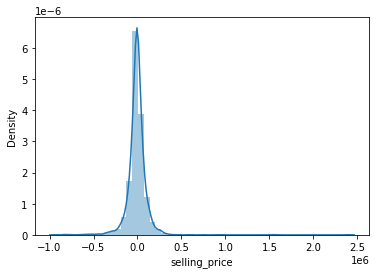

In [119]:
sns.distplot(y_test-predictions)

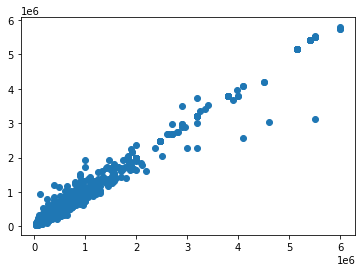

In [120]:
plt.scatter(y_test,predictions)

In [121]:
final_dataset.dtypes

selling_price                     int64
km_driven                         int64
mileage                         float64
engine                            int32
max_power                       float64
seats                             int64
torque_NM                       float64
torque_RPM                      float64
no_of_year_used                   int64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object

In [122]:
import pickle

file = open('random_forest_model.pkl', 'wb')

pickle.dump(rf_random, file)